# Workshop 2: Numpy and Matplotlib

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41586-020-2649-2/MediaObjects/41586_2020_2649_Fig2_HTML.png" width="600">
(Figure 2 of the Numpy review article (doi:10.1038/s41586-020-2649-2))

The NumPy and Matplotlib packages are two of the most fundamental parts of the scientific python "ecosystem". Most everything else is built on top of them.

# Part I:  NumPy

In [1]:
import numpy as np

What did we just do? We __imported__ a package, in particular the NumPy package and gave it a shorter acronym (`np` is arbitrary, but convention).

The standard Python library is deliberately kept small, because there are so many different use cases, scientific computing is just one of them.
Importing packages brings new variables (mostly functions) into our interpreter which allows us to extend functionality with code written by the community.

Specifically, NumPy allows us to operate on (multidimensional) arrays.
The NumPy documentation is crucial: http://docs.scipy.org/doc/numpy/reference/

In [2]:
# find out what version we have
np.__version__

'1.19.1'

## NumPy NDArrays

The core class is the numpy ndarray (n-dimensional array) for which a lot of methods (=functions) are implemented.

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41586-020-2649-2/MediaObjects/41586_2020_2649_Fig1_HTML.png" width="900">

Figure 1 of the NumPy review article with its caption:

    a, The NumPy array data structure and its associated metadata fields. b, Indexing an array with slices and steps. These operations return a ‘view’ of the original data. c, Indexing an array with masks, scalar coordinates or other arrays, so that it returns a ‘copy’ of the original data. In the bottom example, an array is indexed with other arrays; this broadcasts the indexing arguments before performing the lookup. d, Vectorization efficiently applies operations to groups of elements. e, Broadcasting in the multiplication of two-dimensional arrays. f, Reduction operations act along one or more axes. In this example, an array is summed along select axes to produce a vector, or along two axes consecutively to produce a scalar. g, Example NumPy code, illustrating some of these concepts.



In [3]:
# create an array from a list
a = np.array([9,0,2,1,0])

In [4]:
a

array([9, 0, 2, 1, 0])

In [5]:
# find out the datatype
a.dtype

dtype('int64')

In [6]:
# find out the shape
a.shape

(5,)

In [7]:
# what is the shape
type(a.shape)

tuple

In [8]:
# another array with a different datatype and shape
b = np.array([[5,3,1,9],[9,2,3,0]], dtype=np.float64)

In [9]:
b

array([[5., 3., 1., 9.],
       [9., 2., 3., 0.]])

In [10]:
# check dtype and shape
b.dtype, b.shape

(dtype('float64'), (2, 4))

__Important Concept__: The fastest varying dimension is the last dimension! The outer level of the hierarchy is the first dimension. (This is called "c-style" indexing)

## More array creation ##

There are lots of ways to create arrays.

In [11]:
# create some uniform arrays
c = np.zeros((9,9))
d = np.ones((3,6,3), dtype=np.complex128)
e = np.full((3,3), np.pi)
e = np.ones_like(c)
f = np.zeros_like(d)

In [12]:
e

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [13]:
# create some ranges
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
# arange is left inclusive, right exclusive
np.arange(2,4,0.25)

array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75])

In [15]:
# linearly spaced
np.linspace(2,4,3)

array([2., 3., 4.])

In [16]:
# log spaced
np.logspace(1,2,10)

array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])

In [17]:
# two dimensional grids
x = np.linspace(-2*np.pi, 2*np.pi, 10)
y = np.linspace(-np.pi, np.pi, 5)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

((5, 10), (5, 10))

In [18]:
# the meshgrid function can be handy to e.g. create 2D arrays of coordinates
# here we look at the 1D coordinates x and y, and 2D fields of them: xx and yy
# the following lines and plotting will be explained in the next part of the workshop
import matplotlib.pyplot as plt
%matplotlib inline

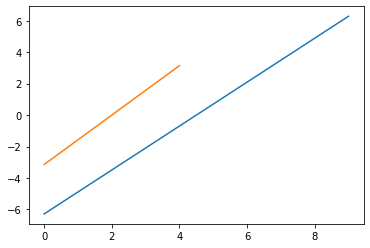

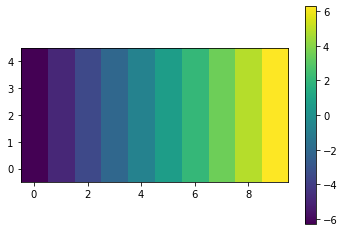

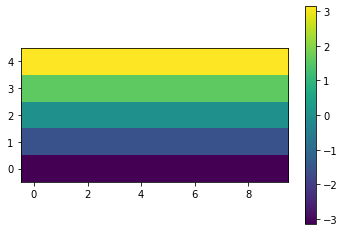

In [19]:
plt.plot(x)
plt.plot(y)

plt.figure()
plt.imshow(xx, origin='lower')
plt.colorbar()

plt.figure()
plt.imshow(yy, origin='lower')
plt.colorbar()

## Indexing ##

Basic indexing is similar to lists

In [20]:
xx

array([[-6.28318531, -4.88692191, -3.4906585 , -2.0943951 , -0.6981317 ,
         0.6981317 ,  2.0943951 ,  3.4906585 ,  4.88692191,  6.28318531],
       [-6.28318531, -4.88692191, -3.4906585 , -2.0943951 , -0.6981317 ,
         0.6981317 ,  2.0943951 ,  3.4906585 ,  4.88692191,  6.28318531],
       [-6.28318531, -4.88692191, -3.4906585 , -2.0943951 , -0.6981317 ,
         0.6981317 ,  2.0943951 ,  3.4906585 ,  4.88692191,  6.28318531],
       [-6.28318531, -4.88692191, -3.4906585 , -2.0943951 , -0.6981317 ,
         0.6981317 ,  2.0943951 ,  3.4906585 ,  4.88692191,  6.28318531],
       [-6.28318531, -4.88692191, -3.4906585 , -2.0943951 , -0.6981317 ,
         0.6981317 ,  2.0943951 ,  3.4906585 ,  4.88692191,  6.28318531]])

In [21]:
# get some individual elements of xx
xx[0,0], xx[-1,-1], xx[3,-5]

(-6.283185307179586, 6.283185307179586, 0.6981317007977319)

In [22]:
# get some whole rows and columns
xx[0].shape, xx[:,-1].shape

((10,), (5,))

In [23]:
# get some ranges
xx[3:15,3:4].shape

(2, 1)

There are many advanced ways to index arrays. You can read about them in the manual. Here is one example.

In [24]:
# use a boolean array as an index
idx = xx<0
yy[idx].shape

(25,)

In [25]:
# the array got flattened
xx.ravel()#.shape

array([-6.28318531, -4.88692191, -3.4906585 , -2.0943951 , -0.6981317 ,
        0.6981317 ,  2.0943951 ,  3.4906585 ,  4.88692191,  6.28318531,
       -6.28318531, -4.88692191, -3.4906585 , -2.0943951 , -0.6981317 ,
        0.6981317 ,  2.0943951 ,  3.4906585 ,  4.88692191,  6.28318531,
       -6.28318531, -4.88692191, -3.4906585 , -2.0943951 , -0.6981317 ,
        0.6981317 ,  2.0943951 ,  3.4906585 ,  4.88692191,  6.28318531,
       -6.28318531, -4.88692191, -3.4906585 , -2.0943951 , -0.6981317 ,
        0.6981317 ,  2.0943951 ,  3.4906585 ,  4.88692191,  6.28318531,
       -6.28318531, -4.88692191, -3.4906585 , -2.0943951 , -0.6981317 ,
        0.6981317 ,  2.0943951 ,  3.4906585 ,  4.88692191,  6.28318531])

In [26]:
# again, you can always check out the doc string of a function
# to see what it does
np.ravel?

Signature: np.ravel(a, order='C')
Docstring:
Return a contiguous flattened array.

A 1-D array, containing the elements of the input, is returned.  A copy is
made only if needed.

As of NumPy 1.10, the returned array will have the same type as the input
array. (for example, a masked array will be returned for a masked array
input)

Parameters
----------
a : array_like
    Input array.  The elements in `a` are read in the order specified by
    `order`, and packed as a 1-D array.
order : {'C','F', 'A', 'K'}, optional

    The elements of `a` are read using this index order. 'C' means
    to index the elements in row-major, C-style order,
    with the last axis index changing fastest, back to the first
    axis index changing slowest.  'F' means to index the elements
    in column-major, Fortran-style order, with the
    first index changing fastest, and the last index changing
    slowest. Note that the 'C' and 'F' options take no account of
    the memory layout of the underlying array

### Basic Math

In [27]:
np.log(10)

2.302585092994046

In [28]:
np.log10([1,10,100])

array([0., 1., 2.])

In [29]:
f = np.sin(xx) * np.cos(0.5*yy)
f

array([[ 1.49975978e-32,  6.03020831e-17,  2.09426937e-17,
        -5.30287619e-17, -3.93593894e-17,  3.93593894e-17,
         5.30287619e-17, -2.09426937e-17, -6.03020831e-17,
        -1.49975978e-32],
       [ 1.73191211e-16,  6.96364240e-01,  2.41844763e-01,
        -6.12372436e-01, -4.54519478e-01,  4.54519478e-01,
         6.12372436e-01, -2.41844763e-01, -6.96364240e-01,
        -1.73191211e-16],
       [ 2.44929360e-16,  9.84807753e-01,  3.42020143e-01,
        -8.66025404e-01, -6.42787610e-01,  6.42787610e-01,
         8.66025404e-01, -3.42020143e-01, -9.84807753e-01,
        -2.44929360e-16],
       [ 1.73191211e-16,  6.96364240e-01,  2.41844763e-01,
        -6.12372436e-01, -4.54519478e-01,  4.54519478e-01,
         6.12372436e-01, -2.41844763e-01, -6.96364240e-01,
        -1.73191211e-16],
       [ 1.49975978e-32,  6.03020831e-17,  2.09426937e-17,
        -5.30287619e-17, -3.93593894e-17,  3.93593894e-17,
         5.30287619e-17, -2.09426937e-17, -6.03020831e-17,
        -1.

## Array Operations ##

There are a huge number of operations available on arrays. All the familiar arithmetic operators are applied on an element-by-element basis.

In [30]:
# find out what's in numpy, these are mostly functions
# you can minimize the output cell by clicking on the bar to the left
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__dir__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__git_revision__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_

## Broadcasting ##

Broadcasting is an efficient way to multiply arrays of different sizes (part (e) in the NumPy figure above)
<img src="http://scipy-lectures.github.io/_images/numpy_broadcasting.png" width="600">

In [31]:
# add f and x  (this is the second row example in the figure above)
print(f.shape, x.shape)
d = f + x
print(d.shape)

(5, 10) (10,)
(5, 10)


In [32]:
# multiply f by x
print(f.shape, x.shape)
g = f * x
print(g.shape)

(5, 10) (10,)
(5, 10)


In [33]:
# multiply f by y
# why does this not work?
print(f.shape, y.shape)
h = f * y
print(h.shape)

(5, 10) (5,)


ValueError: operands could not be broadcast together with shapes (5,10) (5,) 

In [34]:
# use newaxis special syntax
h = f * y[:,np.newaxis]
print(h.shape)

(5, 10)


## Reduction Operation
These operation collapse one or more dimensions by performing an operation, for example, summing over an axis or even all axes.
(part _f_ of the array operations figure above)

In [35]:
g.shape

(5, 10)

In [36]:
# sum
g.sum()

-18.077652068817933

In [37]:
# mean
g.mean()

-0.3615530413763587

In [38]:
# std
g.std()

1.4544951406053706

In [39]:
# apply on just one axis
g_ymean = g.mean(axis=0)
g_xmean = g.mean(axis=1)

## <span style="color:blue">Exercises</span>

1. Write a NumPy program to create an array of 10 zeros, 10 ones, 10 fives. Subsequently create a 3x10 array from them. Ultimately compute the sum column-wise (over axis 0).

2. Create an array of length `N=12` equally spaced between -5 and (including) 3, then compute the square of these values. 

3. Create a two 2D grids of longitudes $\lambda\in[0^\circ,360^\circ]$ and latitudes $\varphi\in[-90^\circ,90^\circ]$ every $30^\circ$. Then calculate $\sin(30^\circ)$ and $\cos(\pi)$, i.e. find out how to use degrees and radians with numpy functions.

4. Create an array of `N=500` samples of the Normal distribution of mean=3, standard deviation=2. Determine the mean and standard deviation with numpy functions.

5. _Hard:_ Compute an approximation to $\pi$ using Monte Carlo sampling. Use only the `numpy.random.uniform()` function. These hints may help:
- The area of a circle is $area = \pi \times radius^2$
- Sample the unit square $(0,1)\times(0,1)$ with $N$ uniformly in $x$ and $y$ distributed points.

## <span style="color:green">Solutions</span>

In [40]:
# 1. Write a NumPy program to create an array of 10 zeros, 10 ones, 10 fives.
# Subsequently create a 3x10 array from them.
# Ultimately compute the sum column-wise (over axis 0).
zeros = np.zeros(10)
ones  = np.ones(10)
fives = np.ones(10)*5
array = np.array([zeros,ones,fives])
print(zeros)
print(ones)
print(fives)
print(array)
print(array.shape)
print(array.sum(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]]
(3, 10)
[6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]


In [41]:
# 2. Create an array of length `N=12` equally spaced between -5 and including 3,
# then compute the square of these values. 
np.linspace(-5,3,12)**2

array([2.50000000e+01, 1.82561983e+01, 1.25702479e+01, 7.94214876e+00,
       4.37190083e+00, 1.85950413e+00, 4.04958678e-01, 8.26446281e-03,
       6.69421488e-01, 2.38842975e+00, 5.16528926e+00, 9.00000000e+00])

In [42]:
# 3. Create a two 2D grids of longitudes $\lambda\in[0,360]$ and 
#latitudes $\varphi\in[-90,90]$ every $30^\circ$.
lons, lats = np.arange(0,361,30), np.arange(-90,91,30)
# I did not specify whether the ranges are including the right values
# the square brackets could suggest so, but if you exclude them,
# that's fine too
lons_grid, lats_grid = np.meshgrid(lons, lats)
print(lons_grid)
print(lats_grid)

# Then calculate $\sin(30^\circ)$ and $\cos(\pi)$,
# i.e. find out how to use degrees and radians with numpy functions.
print(np.sin(30))              # this is wrong
print(np.sin(np.deg2rad(30)))  # this is correct
# --> numpy trigonometric functions want radians, not degrees
print(np.cos(np.pi))

[[  0  30  60  90 120 150 180 210 240 270 300 330 360]
 [  0  30  60  90 120 150 180 210 240 270 300 330 360]
 [  0  30  60  90 120 150 180 210 240 270 300 330 360]
 [  0  30  60  90 120 150 180 210 240 270 300 330 360]
 [  0  30  60  90 120 150 180 210 240 270 300 330 360]
 [  0  30  60  90 120 150 180 210 240 270 300 330 360]
 [  0  30  60  90 120 150 180 210 240 270 300 330 360]]
[[-90 -90 -90 -90 -90 -90 -90 -90 -90 -90 -90 -90 -90]
 [-60 -60 -60 -60 -60 -60 -60 -60 -60 -60 -60 -60 -60]
 [-30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30 -30]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 30  30  30  30  30  30  30  30  30  30  30  30  30]
 [ 60  60  60  60  60  60  60  60  60  60  60  60  60]
 [ 90  90  90  90  90  90  90  90  90  90  90  90  90]]
-0.9880316240928618
0.49999999999999994
-1.0


In [43]:
# 4. Create an array of `N=[500,1200,1e5]` samples of the Normal
# distribution of mean=3, standard deviation=2.
# Determine the mean and standard deviation with numpy functions.
for N in [500,1200,int(1e5)]:
    D = np.random.normal(loc=3, scale=2, size=N)
    print(f'N = {N:6d}, mean = {D.mean():.2f}, std = {D.std()}')
# again, the numbers and letters after the colon in the f-string 
# determine the output format

N =    500, mean = 2.98, std = 1.8533548571586316
N =   1200, mean = 2.83, std = 1.9988355896509091
N = 100000, mean = 3.00, std = 1.9996856446725715


In [44]:
# 5. _Hard:_ Compute an approximation to $\pi$ using Monte Carlo sampling.
# Use only the `numpy.random.uniform()` function. These hints may help:
# - The area of a circle is $area = \pi \times radius^2$
# - Sample the unit square $(0,1)\times(0,1)$ with $N$ uniformly in $x$ and $y$ distributed points.

# we inscribe a circle with radius 1/2 and center (0.5,0.5) into the unit square
# and check whether a randomly selected point is inside the circle or not.
N = 100000

def loop_estimate(N):
    """ this function estimates pi with a Monte Carlo sampling method
    it creates N points by looping over range(N);
    loops are relatively slow in python
    
    input:
    N .. number of samples
    """
    count = 0
    for i in range(N):
        u, v = np.random.uniform(), np.random.uniform()
        d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)
        if d < 0.5:
            count += 1
    area_estimate = count / N
    return area_estimate * 4  # dividing by radius**2
    
def vectorized_estimate(N):
    """ this alterantive function estimates pi with a Monte Carlo sampling method
    it uses NumPy vectors to speed up the calculation significantly
    
    input:
    N .. number of samples
    """
    u, v = np.random.uniform(size=N), np.random.uniform(size=N)
    d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)
    area_estimate = np.ones_like(d)[d<0.5].sum()/N
    return area_estimate * 4  # dividing by radius**2

print(loop_estimate(N))
print(vectorized_estimate(N)) 
# the functions are entirely equivalent
# any difference in performance with respect to pi's true value is random
# just run it again to see the numbers change

3.14204
3.13392


In [45]:
# let's see how the two functions compare in their performance
# here we use an ipython linemagic command to time how long the function takes to run

In [46]:
%timeit loop_estimate(N)

506 ms ± 9.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%timeit vectorized_estimate(N)

2.47 ms ± 75.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
%%time
# another useful (cell)magic command is `%%time` 
# on an otherwise empty first line
# to time the execution of a cell
pi_estimate = vectorized_estimate(N)

CPU times: user 3.48 ms, sys: 945 µs, total: 4.43 ms
Wall time: 3.1 ms
